**DESCRIPCIÓN ESTADÍSTICA DE VISUALIZACIÓN DE VALORES FALTANTES, PAÍSES MÁS ACTIVOS Y FECHAS Y DÍAS DE LA SEMANA DONDE MÁS HUBO ACTIVIDAD EN TWITTER SOBRE EL COVID**

**Objetivo**
S
Visualizar si hay valores faltantes importantes en la base de datos
Visualizar que países son los que más hablas del Covid-19
Visualizar en que fechas y que días de la semana hubo más actividad en la plataforma.
M
Obtener tablas y gráficos
A
Usando textmining, mapas de calor
Usando textmining, histogramas y series de tiempo
R
Usando técnicas de analítica vistas a lo largo del curso
T
listo para el 30 de Octubre de 2020 a las 10:00.

In [106]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as skl
import numpy as np

In [107]:
df = pd.read_csv('covid19_tweets.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [108]:
print('Shape of tweets dataframe : {}'.format(df.shape))

Shape of tweets dataframe : (74436, 13)


In [109]:
def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()/len(data_frame)
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='whitegrid', color_codes=True)
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.xticks(rotation=90)
    plt.show()

In [110]:
return_missing_values(df)

source              0.000161
user_description    0.058534
user_location       0.204444
hashtags            0.287952
dtype: float64

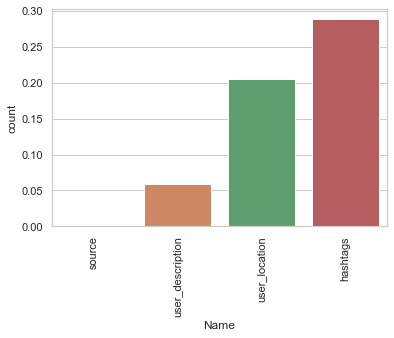

In [111]:
plot_missing_values(df)

<AxesSubplot:>

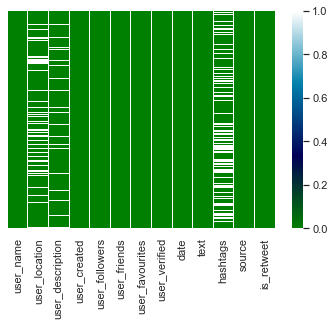

In [112]:
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='ocean')

In [113]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Corona'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()


C:\Users\Admin\anaconda3\envs\El arte de la analtica\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


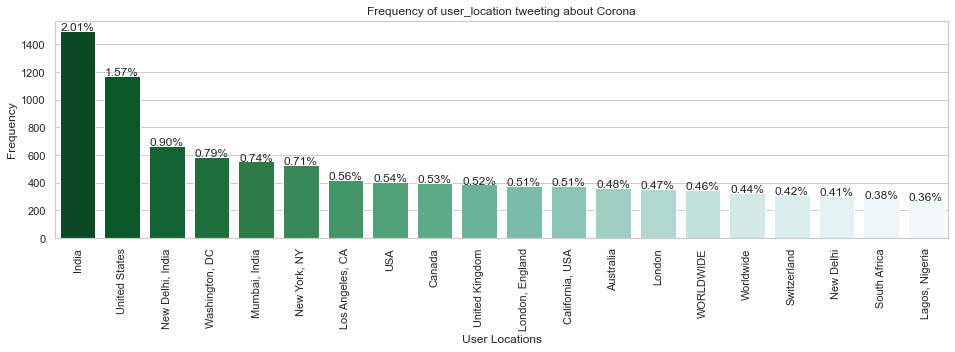

In [114]:
plot_frequency_charts(df, 'user_location', 'User Locations', 'BuGn_r')

C:\Users\Admin\anaconda3\envs\El arte de la analtica\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


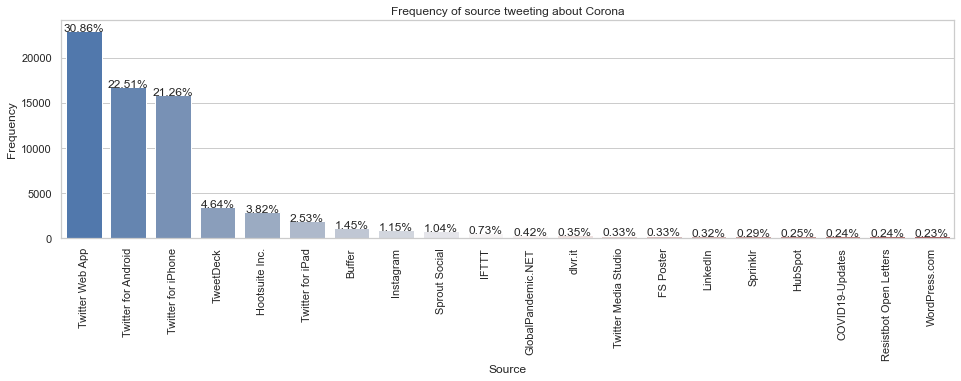

In [115]:
plot_frequency_charts(df, 'source','Source', 'vlag')

In [116]:
dates = df.copy()
dates['date'] = pd.to_datetime(dates['date'])
dates['day'] = dates['date'].dt.date
day_count = dates['day'].value_counts().reset_index()
day_count.rename(columns = {'index':'Date', 'day':'Count'}, inplace = True)
day_count.sort_values(by='Date',ascending=True, inplace=True)
day_count

,Date,Count
10,2020-07-24,295
0,2020-07-25,16881
4,2020-07-26,7500
6,2020-07-27,7500
5,2020-07-28,7500
8,2020-07-29,2780
9,2020-07-30,1980
7,2020-07-31,7500
3,2020-08-01,7500
1,2020-08-02,7500


(array([18468., 18470., 18472., 18474., 18475., 18477.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

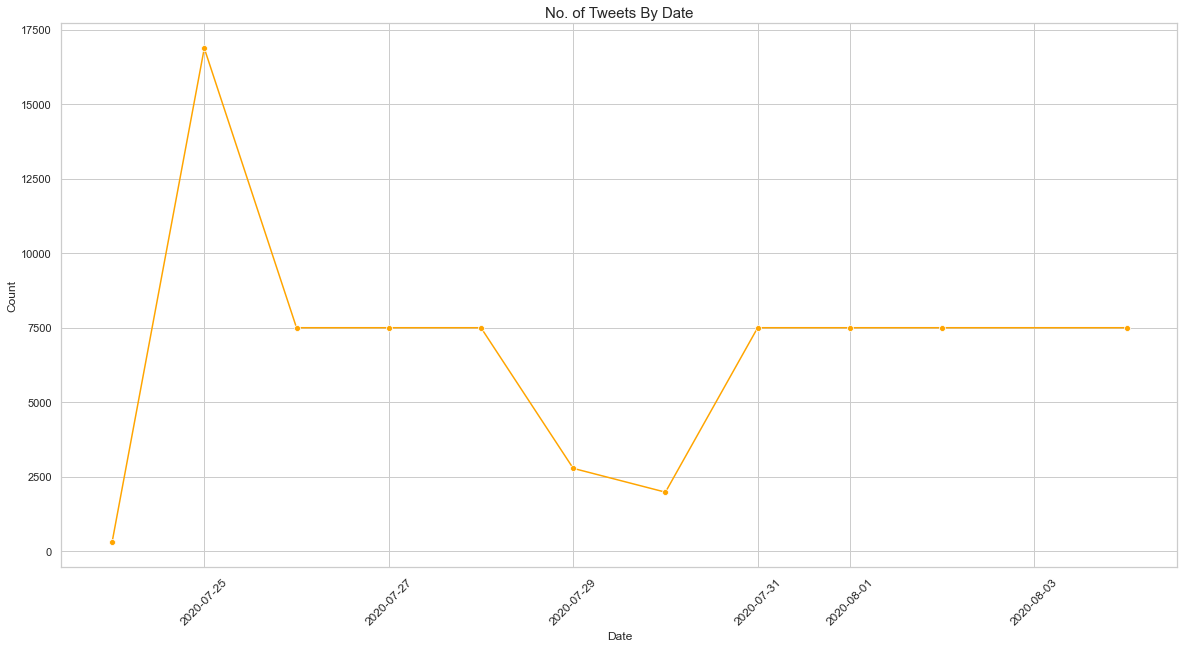

In [117]:
fig,ax = plt.subplots(1,1, figsize=(20,10))
sns.set(style="whitegrid")
sns.lineplot(x=day_count.Date,y=day_count.Count,color='orange',marker='o')
plt.title("No. of Tweets By Date",fontsize=15)
plt.xticks(rotation=45, fontsize=12)

In [118]:
day_names={
    0:'Monday',
    1:'Tueday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
}
days = df.copy()
days['date'] = pd.to_datetime(days['date'])
days['day'] = days['date'].dt.dayofweek
day_weeks = days['day'].value_counts().reset_index()
day_weeks.rename(columns = {'index':'Day', 'day':'Count'}, inplace = True)
day_weeks.sort_values(by='Day',inplace=True)
day_weeks['Day'] = day_weeks['Day'].apply(lambda d:day_names[d])
day_weeks['Percent'] = (day_weeks['Count']/sum(day_weeks['Count'])*100)
day_weeks

,Day,Count,Percent
4,Monday,7500,10.075770
2,Tueday,15000,20.151540
5,Wednesday,2780,3.734752
6,Thursday,1980,2.660003
3,Friday,7795,10.472083
0,Saturday,24381,32.754312
1,Sunday,15000,20.151540


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tueday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

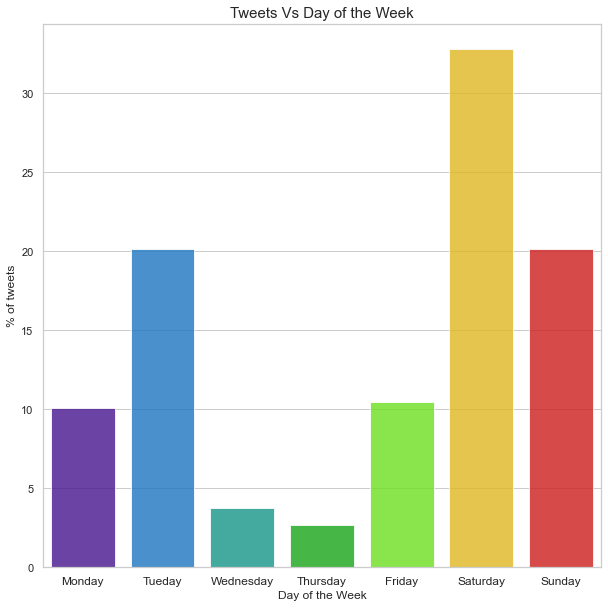

In [119]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
sns.set(style="whitegrid")
sns.barplot(x=day_weeks.Day,y=day_weeks.Percent,palette='nipy_spectral',alpha=0.8)
plt.title("Tweets Vs Day of the Week",fontsize=15)
plt.xlabel('Day of the Week')
plt.ylabel('% of tweets')
plt.xticks(fontsize=12)

In [120]:
def makeList(x):
    x = str(x)
    x = x.replace('[', '')
    x = x.replace(']', '')
    x = x.split(',')
    return x

df_tags = df.copy()
df_tags['hashes'] = df_tags['hashtags'].apply(lambda x:makeList(x))
df_tags = df_tags.explode('hashes')
df_tags['hashes'] = df_tags['hashes'].str.lower()
df_tags['hashes'] = df_tags['hashes'].str.replace(" ","")
df_tags['hashes'] = df_tags['hashes'].str.replace("'","")
tags = df_tags['hashes'].value_counts().reset_index()
tags = tags[0:10]
tags.rename(columns = {'index':'HashTag', 'hashes':'Count'}, inplace = True)
tags

,HashTag,Count
0,covid19,42050
1,nan,21434
2,coronavirus,4312
3,pandemic,698
4,covid,558
5,corona,546
6,india,507
7,covid_19,476
8,trump,447
9,lockdown,390


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'covid19'),
  Text(1, 0, 'nan'),
  Text(2, 0, 'coronavirus'),
  Text(3, 0, 'pandemic'),
  Text(4, 0, 'covid'),
  Text(5, 0, 'corona'),
  Text(6, 0, 'india'),
  Text(7, 0, 'covid_19'),
  Text(8, 0, 'trump'),
  Text(9, 0, 'lockdown')])

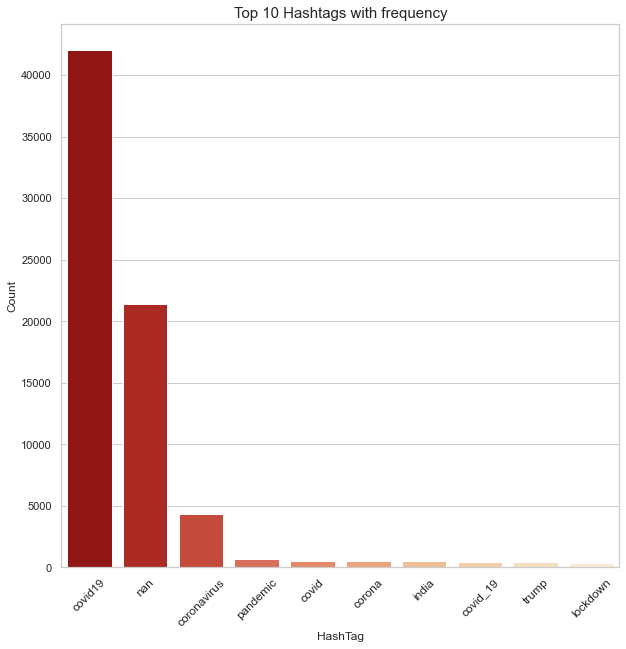

In [121]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
sns.set(style="whitegrid")
sns.barplot(x=tags.HashTag,y=tags.Count,palette='OrRd_r')
plt.title("Top 10 Hashtags with frequency",fontsize=15)
plt.xticks(rotation=45,fontsize=12)